In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
import statsmodels.api as sm
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

import folium

In [27]:
X_train = pd.read_csv('data/Training_set_values.csv', index_col='id')
X_test = pd.read_csv('data/Test_set_values.csv', index_col='id')
y_train = pd.read_csv('data/Training_set_labels.csv', index_col='id')

In [28]:
df = X_train.merge(y_train, on='id')

In [29]:
cols_to_drop = ['amount_tsh',
                'scheme_name', 
                'date_recorded', 
                'wpt_name', 
                'subvillage', 
                'lga', 
                'ward', 
                'recorded_by', 
                'quantity_group',
                'quality_group',
                'payment_type', 
                'funder', 
                'extraction_type_group', 
                'extraction_type_class',
                'management_group',
                'source_type',
                'source_class',
                'waterpoint_type_group'
]
df = df.drop(cols_to_drop, axis = 1)
df = df.fillna('missing', axis = 1)

In [36]:
df_copy_2 = df.copy(deep=True)
df_copy_2['installer'].replace(to_replace='0', value='missing', inplace=True)
df_copy_2['installer'].replace('Gover', 'Government', inplace=True)
df_copy_2['installer'].replace('Commu', 'Community')
df_copy_2['installer'].replace('District council', 'District Council', inplace=True)

toptwenty_installers = list(df_copy_2.installer.value_counts()[:21].index)
toptwenty_installers.remove('missing')
df_copy_2.installer = df_copy_2.installer.apply(lambda x: x if x in toptwenty_installers else 'other')
df_copy_2 = df_copy_2[df_copy_2.installer != 'other']

In [37]:
palette = {"functional":"xkcd:soft green",
"non functional":"xkcd:light red",
"functional needs repair":"xkcd:cerulean"}

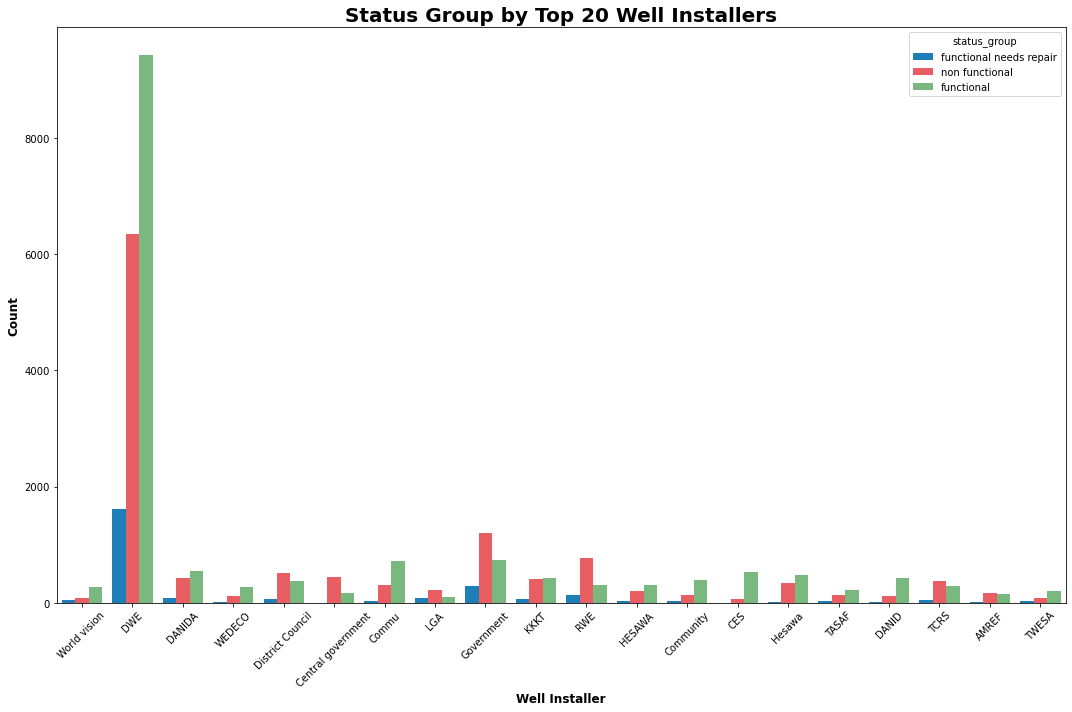

In [42]:
plt.figure(figsize = (15,10))
sns.countplot(x='installer', hue='status_group', palette=palette, data=df_copy_2, 
              hue_order=['functional needs repair', 'non functional', 'functional'])
plt.xlabel("Well Installer", fontweight='bold', size=12)
plt.xticks(rotation=45)
plt.ylabel("Count", fontweight='bold', size=12)
plt.title('Status Group by Top 20 Well Installers',fontweight='bold', size=20)
plt.tight_layout()

In [44]:
viz_df = df.copy(deep=True)
viz_df = viz_df.drop(viz_df[viz_df['longitude']==0].index)

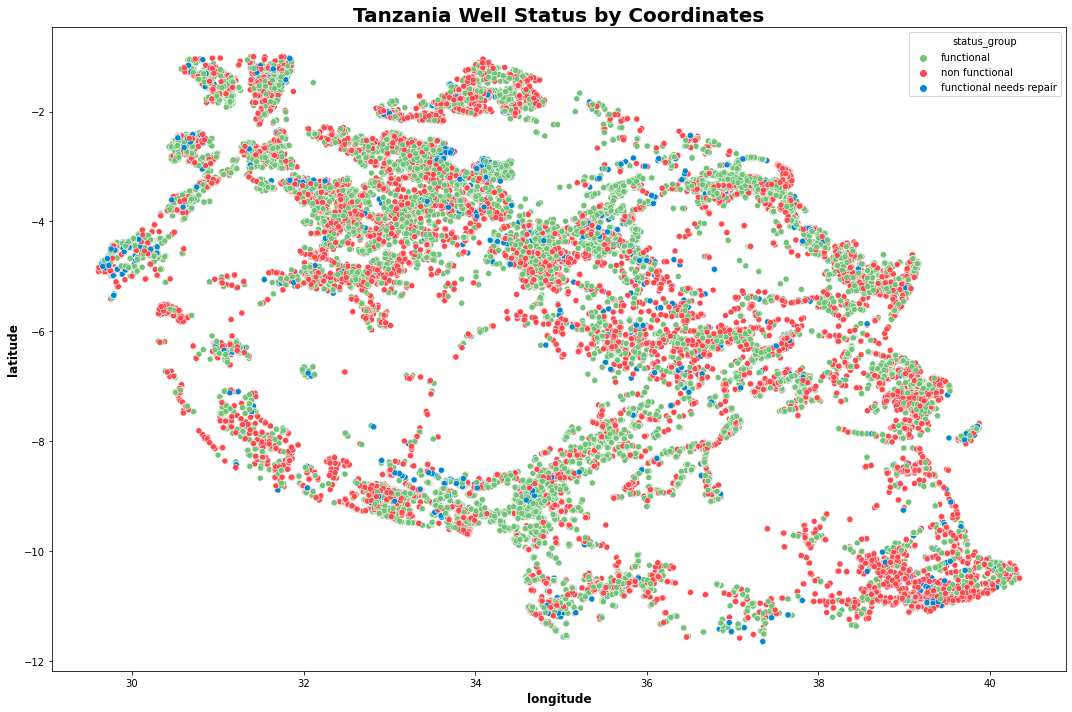

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x='longitude', y='latitude', hue='status_group', palette=palette, sizes=(1, 8), data=viz_df, ax=ax)
plt.xlabel("longitude", fontweight='bold', size=12)
plt.ylabel("latitude", fontweight='bold', size=12)
plt.title('Tanzania Well Status by Coordinates',fontweight='bold', size=20)
plt.tight_layout();

In [59]:
lon = 34.8888
lat = 6.3690

basemap = folium.Map([lat, lon], zoom_start=7)
marker = folium.Marker(location=[viz_df.latitude, viz_df.longitude])

ValueError: Location should consist of two numerical values, but id
69572    -9.856322
8776     -2.147466
34310    -3.821329
67743   -11.155298
19728    -1.825359
           ...    
60739    -3.253847
27263    -9.070629
37057    -8.750434
31282    -6.378573
26348    -6.747464
Name: latitude, Length: 57588, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

TypeError: set_xlabel() missing 1 required positional argument: 'xlabel'

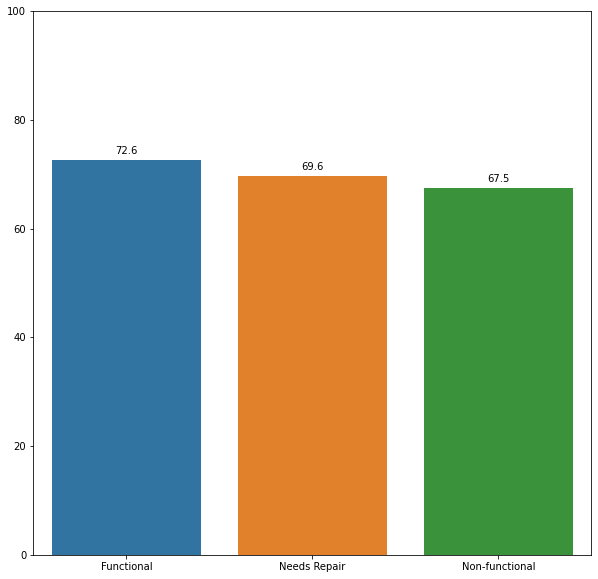

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
x = ['Functional', 'Needs Repair', 'Non-functional']
y = [72.6, 69.6, 67.5]
splot = sns.barplot(x=x, y=y, ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_ylim(0, 100);

In [70]:
dictionary = {'Functional': 72.6, 'Needs Repair': 69.6, 'Non-functional': 67.5}
plot_df = pd.DataFrame(data=dictionary, columns=['Status Group', 'Percent Accurate'])

In [72]:
plot_df.head()

,Status Group,Percent Accurate
